In [1]:
%load_ext autoreload

In [2]:
import sys
sys.path.append('/burg/home/su2254/in_prep/moire/src/localized_orbitals')

import extended_hubbard as eh
import basis as wbasis

import scipy
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import matplotlib as mpl
import matplotlib.font_manager as font_manager
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib import rcParams
import matplotlib.colors as mcolors
plt.rc('font',family='serif')
plt.rc('xtick',labelsize=16)
plt.rc('ytick',labelsize=16)
plt.rc('axes',labelsize=20)
plt.rc('axes',titlesize=20)
plt.rc('legend',fontsize=16)
plt.rc('lines', linewidth=2)
plt.rc('savefig', dpi=300)

plt.rcParams['figure.autolayout'] =  True
plt.rcParams["font.family"] = "Serif"
cmfont = font_manager.FontProperties(fname=mpl.get_data_path() + '/fonts/ttf/cmr10.ttf')
mpl.rcParams['font.serif']=cmfont.get_name()
mpl.rcParams['mathtext.fontset']='cm'
mpl.rcParams['axes.unicode_minus']=False
plt.rcParams['figure.figsize'] = [10, 8]
colors = list(mcolors.XKCD_COLORS.values())

In [4]:
EV_TO_HARTREE = 0.036749322175655                                               
HARTREE_TO_EV = 27.211386245988                                                 
ANGSTROM_TO_BOHR = 1.8897261246257702                                           
BOHR_TO_ANGSTROM = 0.529177210903
RAD_TO_DEG = 180. / np.pi
TOL = 1e-10

In [5]:
%autoreload

nelec = (5, 5)
N_arr = (5, 5)
t_arr = (1, 0.5, 0.1, 0.01, 0.001)
U_arr = (10, 5, 3, 1, 0.1)
L = 1
direct_vecs = L * np.array([[1., np.cos(np.pi/3.)],
                            [0., np.sin(np.pi/3.)]])

EH = eh.ExtendedHubbard(nelec, N_arr, t_arr, U_arr, direct_vecs, verbose=True)


# (nup, ndown) = (5, 5)
# L = 0.529 A
# (Nx, Ny) = (5, 5)
# nsite = 25
# furthest neighbour = 4

# Hopping terms:
#	t0 = 2.721e+04 meV
#	t1 = 1.361e+04 meV
#	t2 = 2.721e+03 meV
#	t3 = 2.721e+02 meV
#	t4 = 2.721e+01 meV

# Coulomb terms:
#	U0 = 2.721e+05 meV
#	U1 = 1.361e+05 meV
#	U2 = 8.163e+04 meV
#	U3 = 2.721e+04 meV
#	U4 = 2.721e+03 meV


# Check $k$-th nearest neighbours

In [6]:
%autoreload

knn_shells = EH.build_knn_shells()


# self.knn_shells:
{0: array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]]),
 1: array([[ 1,  0],
       [ 0,  1],
       [-1,  1],
       [-1,  0],
       [ 0, -1],
       [ 1, -1]]),
 2: array([[ 1,  1],
       [-1,  2],
       [-2,  1],
       [-1, -1],
       [ 1, -2],
       [ 2, -1]]),
 3: array([[ 2,  0],
       [ 0,  2],
       [-2,  2],
       [-2,  0],
       [ 0, -2],
       [ 2, -2]]),
 4: array([[ 2,  1],
       [-1,  3],
       [-3,  2],
       [-2, -1],
       [ 1, -3],
       [ 3, -2],
       [ 1,  2],
       [-2,  3],
       [-3,  1],
       [-1, -2],
       [ 2, -3],
       [ 3, -1]])}


/local/ipykernel_3190362/1752154637.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=(6, 6))


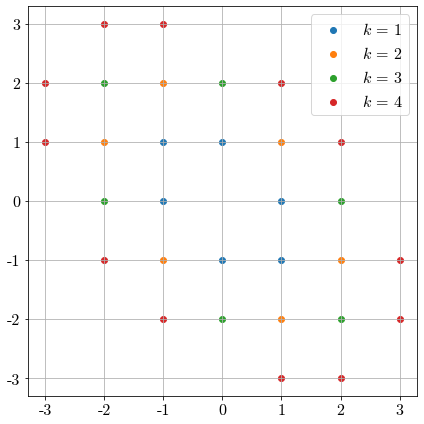

In [7]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

for k in range(1, EH.max_k+1):
    knn_shell = knn_shells[k]
    ax.scatter(knn_shell[:, 0], knn_shell[:, 1], label=rf'$k$ = {k}')

# ax.scatter(EH.direct_vecs[0], EH.direct_vecs[1], label=rf'$L$', marker='x', s=50, lw=3)
ax.set_aspect('equal')
ax.grid()
ax.legend()

/local/ipykernel_3190362/2090252400.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=(6, 6))


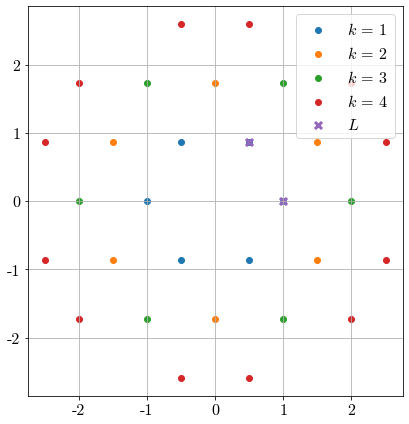

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

for k in range(1, EH.max_k+1):
    knn_shell = knn_shells[k] @ EH.direct_vecs.T
    ax.scatter(knn_shell[:, 0], knn_shell[:, 1], label=rf'$k$ = {k}')

ax.scatter(EH.direct_vecs[0], EH.direct_vecs[1], label=rf'$L$', marker='x', s=50, lw=3)
ax.set_aspect('equal')
ax.grid()
ax.legend()

# Check hopping matrix elements

In [9]:
%autoreload

t0_mat = EH.build_hopping_matrix(0)
t1_mat = EH.build_hopping_matrix(1)
t2_mat = EH.build_hopping_matrix(2)
t3_mat = EH.build_hopping_matrix(3)
t4_mat = EH.build_hopping_matrix(4)
tk_mats = [t0_mat, t1_mat, t2_mat, t3_mat, t4_mat]

/local/ipykernel_3190362/3073538898.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axs = plt.subplots(1, 5, figsize=(14, 10))


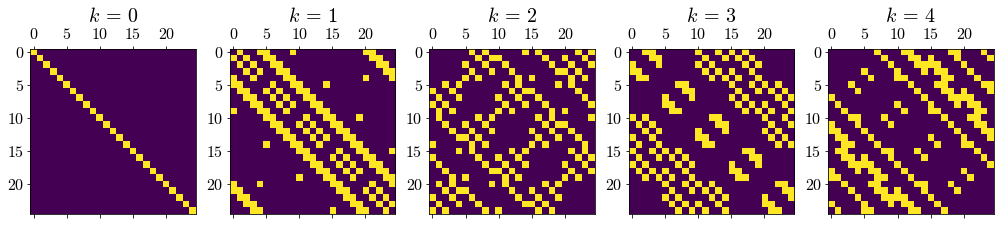

In [10]:
fig, axs = plt.subplots(1, 5, figsize=(14, 10))

for k, tk_mat in enumerate(tk_mats):
    im = axs[k].matshow(tk_mat)
    axs[k].set_title(rf'$k$ = {k}')

/local/ipykernel_3190362/2883299191.py:3: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=(6, 6))
/local/ipykernel_3190362/2883299191.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  cax = divider.append_axes('right', size='5%', pad=0.1)
/local/ipykernel_3190362/2883299191.py:9: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig.colorbar(im, cax=cax, orientation='vertical')


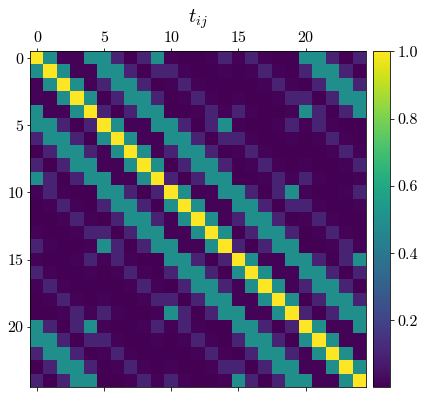

In [11]:
tmat = np.sum(tk_mats, axis=0)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
im = ax.matshow(tmat)
ax.set_title(r'$t_{ij}$')

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
fig.colorbar(im, cax=cax, orientation='vertical')
ax.set_aspect('equal')

# Check coulomb matrix elements

In [12]:
%%time
%autoreload

U0_mat = EH.build_coulomb_matrix(0)
U1_mat = EH.build_coulomb_matrix(1)
U2_mat = EH.build_coulomb_matrix(2)
U3_mat = EH.build_coulomb_matrix(3)
U4_mat = EH.build_coulomb_matrix(4)
Uk_mats = [U0_mat, U1_mat, U2_mat, U3_mat, U4_mat]

CPU times: user 14.7 ms, sys: 62.8 ms, total: 77.4 ms
Wall time: 229 ms


/local/ipykernel_3190362/1960446045.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axs = plt.subplots(1, 5, figsize=(14, 10))


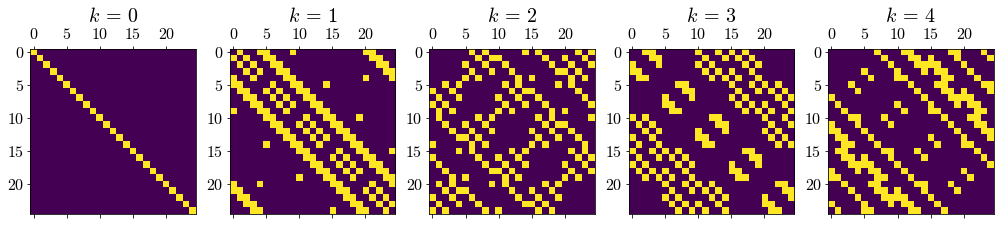

In [13]:
fig, axs = plt.subplots(1, 5, figsize=(14, 10))

for k, Uk_mat in enumerate(Uk_mats):
    im = axs[k].matshow(Uk_mat)
    axs[k].set_title(rf'$k$ = {k}')

/local/ipykernel_3190362/2396539191.py:3: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=(6, 6))
/local/ipykernel_3190362/2396539191.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  cax = divider.append_axes('right', size='5%', pad=0.1)
/local/ipykernel_3190362/2396539191.py:9: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig.colorbar(im, cax=cax, orientation='vertical')


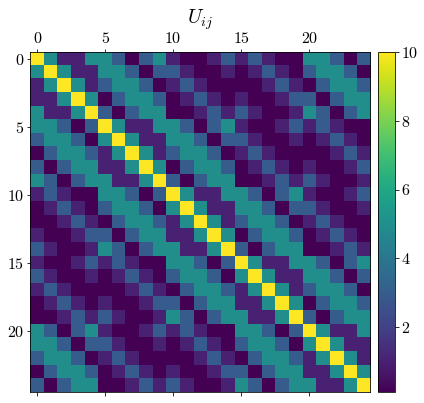

In [14]:
Umat = np.sum(Uk_mats, axis=0)

fig, ax = plt.subplots(1, 1, figsize=(6, 6))
im = ax.matshow(Umat)
ax.set_title(r'$U_{ij}$')

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
fig.colorbar(im, cax=cax, orientation='vertical')
ax.set_aspect('equal')

# Check coulomb ERI

In [15]:
%%time
%autoreload

eri = EH.build_coulomb_eri(coulomb_matrix=Umat)
print(eri.shape)

(25, 25, 25, 25)
CPU times: user 5.53 ms, sys: 71.5 ms, total: 77.1 ms
Wall time: 234 ms


# Check hopping matrix eigenspectrum vs continuum model

For the hopping matrix, if we extracted the hopping parameters $t_k$ and constructed the matrix correctly, we should be able to recover the continuum model eigenspectrum (up to small errors) with a suitable truncation in $k$ (say $k = 3$?). We can exactly diagonalize both matrices easily.

For this purpose, let's use the parameters from MDHPM's paper:

\begin{align}
    m^* &= 0.35 \\
    \epsilon &= 10 \\
    V_m &= 11 \ \text{meV} \\
    \phi &= -94^{\circ}
\end{align}


## Small $\theta$ regime

In this regime, the offsite (*i.e.* off-diagonal) matrix elements are $\approx 0$, so the eigenspectrum should be similar to the onsite matrix elements. Let's take $L_m = 250.904 \ \mathring A = 2.514^{\circ}$.

## Continuum model solution

In [16]:
%%time 
%autoreload

path = '/burg/ccce/users/su2254/qchem/libpbc-stable/build/libgscf/tests/rescaled_cm_kpt/'
filetag = 'mdhpm_check/nkpt=25/ghf_Lm=250.904_V0=0.011_eps=10_ecut=0.0043_nbsf=127_nkpt=25_tri_2d'

kpts_fname = path + filetag + '.kpts.csv'
mrv_fname = path + filetag + '.moire_recip_vecs.csv'
basis_fname = path + filetag + '.basis.csv'

kpts = np.loadtxt(kpts_fname, delimiter=',', skiprows=1).T
moire_recip_vecs = np.loadtxt(mrv_fname, delimiter=',', skiprows=1)
basis = np.loadtxt(basis_fname, delimiter=',', skiprows=1).T
nkpt = kpts.shape[0]
basis_obj = wbasis.Basis(moire_recip_vecs, basis, kpts)
basis_obj.build()

rcm_kpts = []
for i in range(nkpt):
    rcm_kpts_fname = path + filetag + f'.rcm_kpt{i}.csv'
    rcm_kpt = np.loadtxt(rcm_kpts_fname, delimiter=',', skiprows=1, dtype=np.complex128)
    rcm_kpts.append(rcm_kpt)


# Building basis...
ncorner = 0
nedge = 6
nouter = 6

ncorner_unique = 0
nedge_unique = 6
nouter_unique = 6

nkpt_unique = 25
ninner = 19
CPU times: user 343 ms, sys: 137 ms, total: 481 ms
Wall time: 5.66 s


In [17]:
meff, eps, ecut, Lm, V0, phi, alpha, beta = None, None, None, None, None, None, None, None

with open(kpts_fname, 'r') as f: 
    header = f.readline().split(',')
    meff, eps, ecut, Lm, V0, phi, alpha, beta = header
    meff = float(meff)
    eps = float(eps)
    ecut = float(ecut)
    Lm = float(Lm)
    V0 = float(V0)
    phi = float(phi)
    alpha = float(alpha)
    beta = float(beta)
    
    print(f'meff =\t{meff:<8}\neps =\t{eps:<8}\necut =\t{ecut:<8}\nLm =\t{Lm:<8}',
          f'\nV0 =\t{V0:<8}\nphi =\t{phi:<8}\nalpha =\t{alpha:<8}\nbeta =\t{beta:<8}')
    
Lm *= ANGSTROM_TO_BOHR

meff =	0.34999999403954
eps =	10.0    
ecut =	0.00430000014603
Lm =	250.90400695800778 
V0 =	0.0109999999404
phi =	-1.64060949687467
alpha =	285.7142905799711
beta =	0.03499999940395


In [18]:
%%time

bloch_energy = []
bloch_coeff_pw = []

for i in range(nkpt):
    h1 = rcm_kpts[i]
    e, c = scipy.linalg.eigh(h1)
    e *= HARTREE_TO_EV * 1000. / alpha
    bloch_energy.append(e)
    bloch_coeff_pw.append(c)

bloch_energy = np.array(bloch_energy)[:, 0] # Lowest band.
bloch_coeff_pw = np.array(bloch_coeff_pw)[:, :, 0].T

CPU times: user 4.08 s, sys: 2.86 s, total: 6.94 s
Wall time: 1.24 s


In [19]:
bloch_energy

array([-37.31732159, -37.31688074, -37.31688074, -37.31688074,
       -37.31688074, -37.31688074, -37.31688074, -37.31630353,
       -37.31630353, -37.31630353, -37.31630353, -37.31630353,
       -37.31630353, -37.31616724, -37.31616724, -37.31616724,
       -37.31616724, -37.31616724, -37.31616724, -37.3159467 ,
       -37.3159467 , -37.3159467 , -37.3159467 , -37.3159467 ,
       -37.3159467 ])

/local/ipykernel_3190362/1885969814.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=(6, 6))


Text(0, 0.5, '$E$ (meV)')

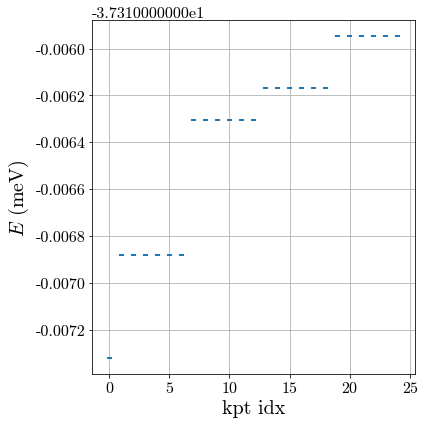

In [20]:
xticks = np.array([i for i in range(basis_obj.nkpt)])
dx = 0.2

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

for i in range(basis_obj.nkpt):
    x = xticks[i]
    ax.hlines(bloch_energy[i], x-dx, x+dx)

# ax.axhline(0., color='r', ls='--')
ax.grid()
ax.set_xlabel('kpt idx')
ax.set_ylabel('$E$ (meV)')

## Construct hopping matrix

The $t_k$ and $U_k$ parameters were extracted in 

```$SCRATCHDIR/qchem_output/results/nu=1-2/ghf/pinball/wannier_lo_from_cm_grid_tests/mdhpm_check.ipnyb```

In [21]:
%autoreload

nelec = (25, 0)
N_arr = (5, 5)

t_arr = np.array([-37.31636443674133, # meV,
                   -0.0001595430786988522,
                    1.2102654785638525e-08, 
                    6.41465517952158e-09,
                   -1.3605693122993998e-09]) * EV_TO_HARTREE/1000.

U_arr = np.array([55.75538784308023, # meV
                   5.714391111657481, 
                   3.2653663495185596, 
                   2.99325248705868,
                   2.17691089967904]) * EV_TO_HARTREE/1000.

L = 250.904 # Angstrom.
direct_vecs = basis_obj.direct_vecs
np.testing.assert_allclose(L, scipy.linalg.norm(direct_vecs[:, 0]) * BOHR_TO_ANGSTROM)

EH = eh.ExtendedHubbard(nelec, N_arr, t_arr, U_arr, direct_vecs, verbose=True)


# (nup, ndown) = (25, 0)
# L = 250.904 A
# (Nx, Ny) = (5, 5)
# nsite = 25
# furthest neighbour = 4

# Hopping terms:
#	t0 = -3.732e+01 meV
#	t1 = -1.595e-04 meV
#	t2 = 1.210e-08 meV
#	t3 = 6.415e-09 meV
#	t4 = -1.361e-09 meV

# Coulomb terms:
#	U0 = 5.576e+01 meV
#	U1 = 5.714e+00 meV
#	U2 = 3.265e+00 meV
#	U3 = 2.993e+00 meV
#	U4 = 2.177e+00 meV


In [22]:
%autoreload

t0_mat = EH.build_hopping_matrix(0)
t1_mat = EH.build_hopping_matrix(1)
t2_mat = EH.build_hopping_matrix(2)
t3_mat = EH.build_hopping_matrix(3)
t4_mat = EH.build_hopping_matrix(4)
tk_mats = np.array([t0_mat, t1_mat, t2_mat, t3_mat, t4_mat])
t_mat = np.sum(tk_mats, axis=0)


# self.knn_shells:
{0: array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]]),
 1: array([[ 1,  0],
       [ 0,  1],
       [-1,  1],
       [-1,  0],
       [ 0, -1],
       [ 1, -1]]),
 2: array([[ 1,  1],
       [-1,  2],
       [-2,  1],
       [-1, -1],
       [ 1, -2],
       [ 2, -1]]),
 3: array([[ 2,  0],
       [ 0,  2],
       [-2,  2],
       [-2,  0],
       [ 0, -2],
       [ 2, -2]]),
 4: array([[ 2,  1],
       [-1,  3],
       [-3,  2],
       [-2, -1],
       [ 1, -3],
       [ 3, -2],
       [ 1,  2],
       [-2,  3],
       [-3,  1],
       [-1, -2],
       [ 2, -3],
       [ 3, -1]])}


Let's see what the hopping matrices look like (in meV).

/local/ipykernel_3190362/2952385655.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axs = plt.subplots(1, 5, figsize=(16, 10))
/local/ipykernel_3190362/2952385655.py:14: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  cax = divider.append_axes('right', size='5%', pad=0.1)
/local/ipykernel_3190362/2952385655.py:15: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig.colorbar(im, cax=cax, orientation='vertical')


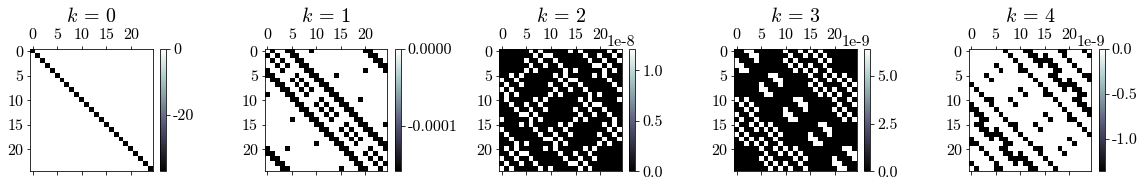

In [23]:
fig, axs = plt.subplots(1, 5, figsize=(16, 10))
axs = axs.flatten()

vmin = np.amin(tk_mats) * HARTREE_TO_EV * 1000.
vmax = np.amax(tk_mats) * HARTREE_TO_EV * 1000.

for k, tk_mat in enumerate(tk_mats):
    ax = axs[k]
    #im = ax.matshow(tk_mat * HARTREE_TO_EV * 1000., vmin=vmin, vmax=vmax, cmap='bone')
    im = ax.matshow(tk_mat * HARTREE_TO_EV * 1000., cmap='bone')
    ax.set_title(rf'$k$ = {k}')
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.1)
    fig.colorbar(im, cax=cax, orientation='vertical')
    ax.set_aspect('equal')

/local/ipykernel_3190362/1043840706.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=(6, 6))
/local/ipykernel_3190362/1043840706.py:7: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  cax = divider.append_axes('right', size='5%', pad=0.1)
/local/ipykernel_3190362/1043840706.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig.colorbar(im, cax=cax, orientation='vertical')


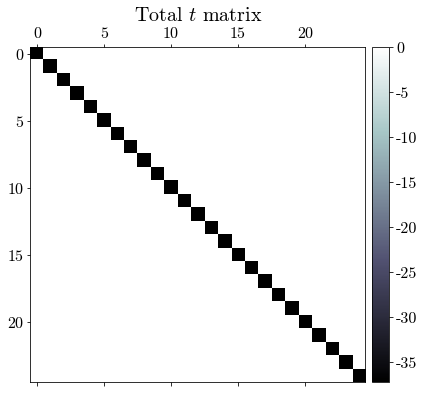

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

im = ax.matshow(t_mat * HARTREE_TO_EV * 1000., cmap='bone')
ax.set_title(rf'Total $t$ matrix')

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
fig.colorbar(im, cax=cax, orientation='vertical')
ax.set_aspect('equal')

## Diagonalize

In [25]:
t_e, t_c = scipy.linalg.eigh(t_mat)
t_e *= HARTREE_TO_EV * 1000.

/local/ipykernel_3190362/1554109727.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=(6, 6))


Text(0, 0.5, '$E$ (meV)')

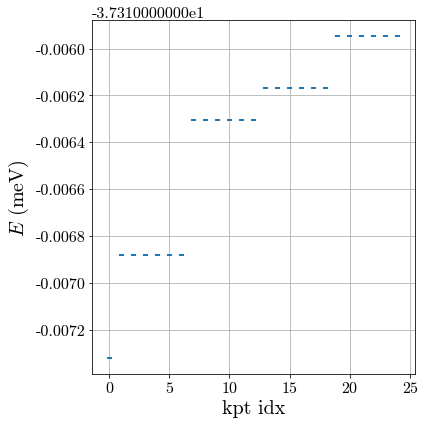

In [26]:
xticks = np.array([i for i in range(basis_obj.nkpt)])
dx = 0.2

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

for i in range(basis_obj.nkpt):
    x = xticks[i]
    ax.hlines(t_e[i], x-dx, x+dx)

# ax.axhline(0., color='r', ls='--')
ax.grid()
ax.set_xlabel('kpt idx')
ax.set_ylabel('$E$ (meV)')

## Compare

In [27]:
diff = t_e - bloch_energy
pdiff = diff/bloch_energy * 100.

print(f'max |diff| = {np.amax(np.absolute(diff))}')
print(f'max |pdiff| = {np.amax(np.absolute(pdiff))}')

max |diff| = 1.1810179501026141e-08
max |pdiff| = 3.164914881248497e-08


/local/ipykernel_3190362/4024461969.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axs = plt.subplots(1, 3, figsize=(14, 6))


Text(0, 0.5, '$E$ (meV)')

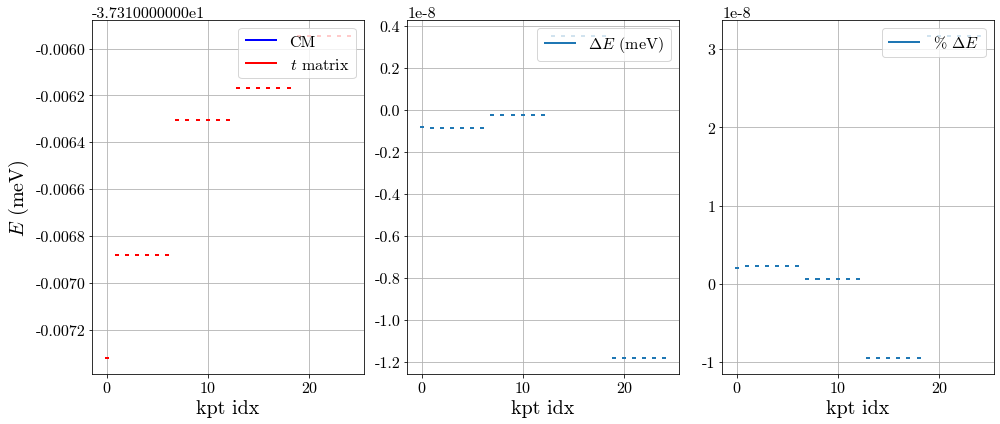

In [28]:
xticks = np.array([i for i in range(basis_obj.nkpt)])
dx = 0.2

fig, axs = plt.subplots(1, 3, figsize=(14, 6))
axs = axs.flatten()

for i in range(basis_obj.nkpt):
    label1, label2 = None, None
    labeld, labelpd = None, None
    
    if i == 0:
        label1 = 'CM'
        label2 = '$t$ matrix'
        labeld = r'$\Delta E$ (meV)'
        labelpd = r'% $\Delta E$'
        
    x = xticks[i]
    axs[0].hlines(bloch_energy[i], x-dx, x+dx, color='b', label=label1)
    axs[0].hlines(t_e[i], x-dx, x+dx, color='r', label=label2)
    
    axs[1].hlines(diff[i], x-dx, x+dx, label=labeld)
    axs[2].hlines(pdiff[i], x-dx, x+dx, label=labelpd)

for ax in axs:
    ax.set_xlabel('kpt idx')
    ax.legend()
    ax.grid()
    
axs[0].set_ylabel('$E$ (meV)')

The eigenspectrums agree! So we know that the hopping matrix faithfully represents the non-interacting continuum model in the small $\theta$ regime.

## Large $\theta$ regime

In this regime, the offsite (*i.e.* off-diagonal) matrix elements are not $\approx 0$, though they're still $\mathcal{O}(0.1)$ of the magnitude of the onsite matrix elements. The eigenspectrum should not be augmented too far from the onsite matrix elements. Let's take $L_m = 75.658 \ \mathring A \implies \theta = 0.758^{\circ}$.

## Continuum model solution

In [30]:
%%time 
%autoreload

path = '/burg/ccce/users/su2254/qchem/libpbc-stable/build/libgscf/tests/rescaled_cm_kpt/'
filetag = 'mdhpm_check/nkpt=25/ghf_Lm=63.407_V0=0.011_eps=10_ecut=0.067_nbsf=127_nkpt=25_tri_2d'
#filetag = 'mdhpm_check/nkpt=25/ghf_Lm=75.658_V0=0.011_eps=10_ecut=0.047_nbsf=127_nkpt=25_tri_2d'

kpts_fname = path + filetag + '.kpts.csv'
mrv_fname = path + filetag + '.moire_recip_vecs.csv'
basis_fname = path + filetag + '.basis.csv'

kpts = np.loadtxt(kpts_fname, delimiter=',', skiprows=1).T
moire_recip_vecs = np.loadtxt(mrv_fname, delimiter=',', skiprows=1)
basis = np.loadtxt(basis_fname, delimiter=',', skiprows=1).T
nkpt = kpts.shape[0]
basis_obj = wbasis.Basis(moire_recip_vecs, basis, kpts)
basis_obj.build()

rcm_kpts = []
for i in range(nkpt):
    rcm_kpts_fname = path + filetag + f'.rcm_kpt{i}.csv'
    rcm_kpt = np.loadtxt(rcm_kpts_fname, delimiter=',', skiprows=1, dtype=np.complex128)
    rcm_kpts.append(rcm_kpt)


# Building basis...
ncorner = 0
nedge = 6
nouter = 6

ncorner_unique = 0
nedge_unique = 6
nouter_unique = 6

nkpt_unique = 25
ninner = 19
CPU times: user 332 ms, sys: 150 ms, total: 482 ms
Wall time: 4.47 s


In [31]:
meff, eps, ecut, Lm, V0, phi, alpha, beta = None, None, None, None, None, None, None, None

with open(kpts_fname, 'r') as f: 
    header = f.readline().split(',')
    meff, eps, ecut, Lm, V0, phi, alpha, beta = header
    meff = float(meff)
    eps = float(eps)
    ecut = float(ecut)
    Lm = float(Lm)
    V0 = float(V0)
    phi = float(phi)
    alpha = float(alpha)
    beta = float(beta)
    
    print(f'meff =\t{meff:<8}\neps =\t{eps:<8}\necut =\t{ecut:<8}\nLm =\t{Lm:<8}',
          f'\nV0 =\t{V0:<8}\nphi =\t{phi:<8}\nalpha =\t{alpha:<8}\nbeta =\t{beta:<8}')
    
Lm *= ANGSTROM_TO_BOHR

meff =	0.34999999403954
eps =	10.0    
ecut =	0.06700000166893
Lm =	63.40700149536133 
V0 =	0.0109999999404
phi =	-1.64060949687467
alpha =	285.7142905799711
beta =	0.03499999940395


In [32]:
%%time

bloch_energy = []
bloch_coeff_pw = []

for i in range(nkpt):
    h1 = rcm_kpts[i]
    e, c = scipy.linalg.eigh(h1)
    e *= HARTREE_TO_EV * 1000. / alpha
    bloch_energy.append(e)
    bloch_coeff_pw.append(c)

bloch_energy = np.array(bloch_energy)[:, 0] # Lowest band.
bloch_coeff_pw = np.array(bloch_coeff_pw)[:, :, 0].T

CPU times: user 3.34 s, sys: 2.4 s, total: 5.74 s
Wall time: 204 ms


In [33]:
bloch_energy

array([-5.23104478e+00, -2.14616404e-02, -2.14616404e-02, -2.14616404e-02,
       -2.14616404e-02, -2.14616404e-02, -2.14616404e-02,  9.88538078e+00,
        9.88538078e+00,  9.88538078e+00,  9.88538078e+00,  9.88538078e+00,
        9.88538078e+00,  1.40761179e+01,  1.40761179e+01,  1.40761179e+01,
        1.40761179e+01,  1.40761179e+01,  1.40761179e+01,  2.19533540e+01,
        2.19533540e+01,  2.19533540e+01,  2.19533540e+01,  2.19533540e+01,
        2.19533540e+01])

/local/ipykernel_3190362/1885969814.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=(6, 6))


Text(0, 0.5, '$E$ (meV)')

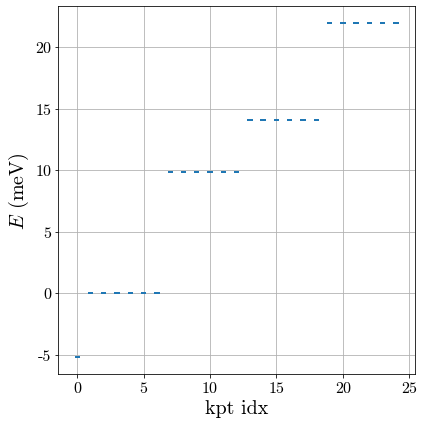

In [34]:
xticks = np.array([i for i in range(basis_obj.nkpt)])
dx = 0.2

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

for i in range(basis_obj.nkpt):
    x = xticks[i]
    ax.hlines(bloch_energy[i], x-dx, x+dx)

# ax.axhline(0., color='r', ls='--')
ax.grid()
ax.set_xlabel('kpt idx')
ax.set_ylabel('$E$ (meV)')

/local/ipykernel_3190362/2631617434.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=(6, 6))
/local/ipykernel_3190362/2631617434.py:5: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  cax = divider.append_axes('right', size='5%', pad=0.1)
/local/ipykernel_3190362/2631617434.py:6: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig.colorbar(im, cax=cax, orientation='vertical')


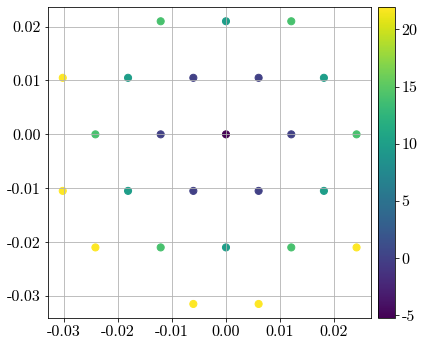

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))
im = ax.scatter(basis_obj.kpts[:, 0], basis_obj.kpts[:, 1], s=50, c=bloch_energy)

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
fig.colorbar(im, cax=cax, orientation='vertical')
        
ax.grid()
ax.set_aspect('equal')

## Construct hopping matrix

The $t_k$ and $U_k$ parameters were extracted in 

```$SCRATCHDIR/qchem_output/results/nu=1-2/ghf/pinball/wannier_lo_from_cm_grid_tests/mdhpm_check.ipnyb```

In [36]:
%autoreload

nelec = (25, 0)
N_arr = (5, 5)

# L = 75.658 # Angstrom.
# t_arr = np.array([ 2.006412417901089, # meV
#                   -1.8945988006864796,
#                    0.25547249470907696, 
#                    0.13914818457057596,
#                   -0.04751381116060845]) * EV_TO_HARTREE/1000.

# U_arr = np.array([78.94680388185203, # meV
#                   19.85982778607518, 
#                   20.174992620542774, 
#                   11.179089228335377,
#                    9.5239851860958]) * EV_TO_HARTREE/1000.

L = 63.407 # Angstrom.
t_arr = np.array([10.783250788724702, # meV
                  -3.3408370897902318,
                   0.5934317829282448, 
                   0.30517946077351354,
                  -0.14369105535439888]) * EV_TO_HARTREE/1000.

U_arr = np.array([81.15724858058178, # meV
                  25.057668468396148, 
                  23.869374908831823, 
                  31.972628276889345,
                  10.264472749728327]) * EV_TO_HARTREE/1000.

direct_vecs = basis_obj.direct_vecs
np.testing.assert_allclose(L, scipy.linalg.norm(direct_vecs[:, 0]) * BOHR_TO_ANGSTROM)

EH = eh.ExtendedHubbard(nelec, N_arr, t_arr, U_arr, direct_vecs, verbose=True)


# (nup, ndown) = (25, 0)
# L = 63.407 A
# (Nx, Ny) = (5, 5)
# nsite = 25
# furthest neighbour = 4

# Hopping terms:
#	t0 = 1.078e+01 meV
#	t1 = -3.341e+00 meV
#	t2 = 5.934e-01 meV
#	t3 = 3.052e-01 meV
#	t4 = -1.437e-01 meV

# Coulomb terms:
#	U0 = 8.116e+01 meV
#	U1 = 2.506e+01 meV
#	U2 = 2.387e+01 meV
#	U3 = 3.197e+01 meV
#	U4 = 1.026e+01 meV


In [37]:
%autoreload

t0_mat = EH.build_hopping_matrix(0)
t1_mat = EH.build_hopping_matrix(1)
t2_mat = EH.build_hopping_matrix(2)
t3_mat = EH.build_hopping_matrix(3)
t4_mat = EH.build_hopping_matrix(4)
tk_mats = np.array([t0_mat, t1_mat, t2_mat, t3_mat, t4_mat])
t_mat = np.sum(tk_mats, axis=0)


# self.knn_shells:
{0: array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0]]),
 1: array([[ 1,  0],
       [ 0,  1],
       [-1,  1],
       [-1,  0],
       [ 0, -1],
       [ 1, -1]]),
 2: array([[ 1,  1],
       [-1,  2],
       [-2,  1],
       [-1, -1],
       [ 1, -2],
       [ 2, -1]]),
 3: array([[ 2,  0],
       [ 0,  2],
       [-2,  2],
       [-2,  0],
       [ 0, -2],
       [ 2, -2]]),
 4: array([[ 2,  1],
       [-1,  3],
       [-3,  2],
       [-2, -1],
       [ 1, -3],
       [ 3, -2],
       [ 1,  2],
       [-2,  3],
       [-3,  1],
       [-1, -2],
       [ 2, -3],
       [ 3, -1]])}


Let's see what the hopping matrices look like (in meV).

/local/ipykernel_3190362/2952385655.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axs = plt.subplots(1, 5, figsize=(16, 10))
/local/ipykernel_3190362/2952385655.py:14: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  cax = divider.append_axes('right', size='5%', pad=0.1)
/local/ipykernel_3190362/2952385655.py:15: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig.colorbar(im, cax=cax, orientation='vertical')


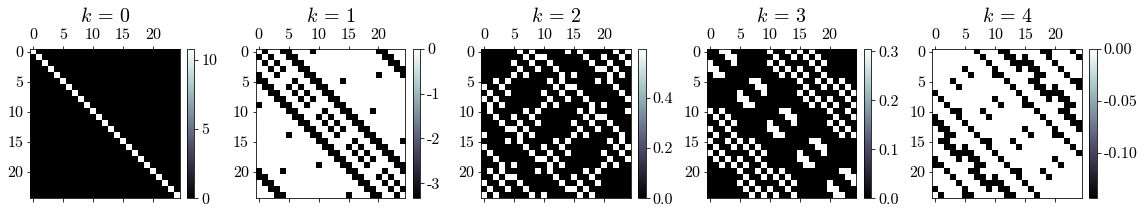

In [38]:
fig, axs = plt.subplots(1, 5, figsize=(16, 10))
axs = axs.flatten()

vmin = np.amin(tk_mats) * HARTREE_TO_EV * 1000.
vmax = np.amax(tk_mats) * HARTREE_TO_EV * 1000.

for k, tk_mat in enumerate(tk_mats):
    ax = axs[k]
    #im = ax.matshow(tk_mat * HARTREE_TO_EV * 1000., vmin=vmin, vmax=vmax, cmap='bone')
    im = ax.matshow(tk_mat * HARTREE_TO_EV * 1000., cmap='bone')
    ax.set_title(rf'$k$ = {k}')
    
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='5%', pad=0.1)
    fig.colorbar(im, cax=cax, orientation='vertical')
    ax.set_aspect('equal')

/local/ipykernel_3190362/1043840706.py:1: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=(6, 6))
/local/ipykernel_3190362/1043840706.py:7: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  cax = divider.append_axes('right', size='5%', pad=0.1)
/local/ipykernel_3190362/1043840706.py:8: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig.colorbar(im, cax=cax, orientation='vertical')


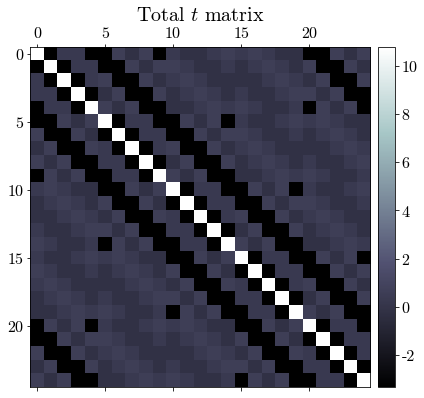

In [39]:
fig, ax = plt.subplots(1, 1, figsize=(6, 6))

im = ax.matshow(t_mat * HARTREE_TO_EV * 1000., cmap='bone')
ax.set_title(rf'Total $t$ matrix')

divider = make_axes_locatable(ax)
cax = divider.append_axes('right', size='5%', pad=0.1)
fig.colorbar(im, cax=cax, orientation='vertical')
ax.set_aspect('equal')

## Diagonalize

In [40]:
t_e, t_c = scipy.linalg.eigh(t_mat)
t_e *= HARTREE_TO_EV * 1000.

/local/ipykernel_3190362/1554109727.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, ax = plt.subplots(1, 1, figsize=(6, 6))


Text(0, 0.5, '$E$ (meV)')

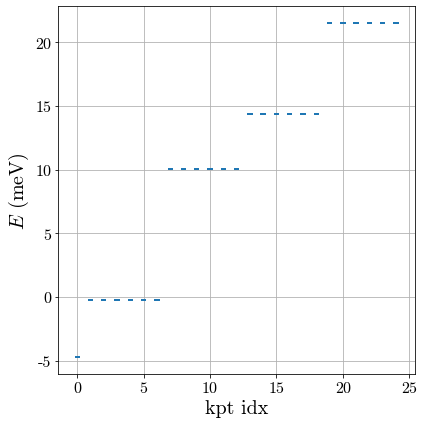

In [41]:
xticks = np.array([i for i in range(basis_obj.nkpt)])
dx = 0.2

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

for i in range(basis_obj.nkpt):
    x = xticks[i]
    ax.hlines(t_e[i], x-dx, x+dx)

# ax.axhline(0., color='r', ls='--')
ax.grid()
ax.set_xlabel('kpt idx')
ax.set_ylabel('$E$ (meV)')

In [42]:
t_e

array([-4.73225062, -0.2556304 , -0.2556304 , -0.2556304 , -0.2556304 ,
       -0.2556304 , -0.2556304 , 10.06185076, 10.06185076, 10.06185076,
       10.06185076, 10.06185076, 10.06185076, 14.40159454, 14.40159454,
       14.40159454, 14.40159454, 14.40159454, 14.40159454, 21.51110516,
       21.51110516, 21.51110516, 21.51110516, 21.51110516, 21.51110516])

## Compare

In [43]:
diff = t_e - bloch_energy
pdiff = diff/bloch_energy * 100.

print(f'max |diff| = {np.amax(np.absolute(diff))}')
print(f'max |pdiff| = {np.amax(np.absolute(pdiff))}')

max |diff| = 0.49879416352247485
max |pdiff| = 1091.1037297323887


In [44]:
np.sort(np.absolute(pdiff))[::-1]

array([1091.10372973, 1091.10372973, 1091.10372973, 1091.10372973,
       1091.10372973, 1091.10372973,    9.53526846,    2.31226134,
          2.31226134,    2.31226134,    2.31226134,    2.31226134,
          2.31226134,    2.01449337,    2.01449337,    2.01449337,
          2.01449337,    2.01449337,    2.01449337,    1.78516121,
          1.78516121,    1.78516121,    1.78516121,    1.78516121,
          1.78516121])

/local/ipykernel_3190362/2335772306.py:4: UserWarning: cmr10 font should ideally be used with mathtext, set axes.formatter.use_mathtext to True
  fig, axs = plt.subplots(1, 3, figsize=(14, 6))


Text(0, 0.5, '$E$ (meV)')

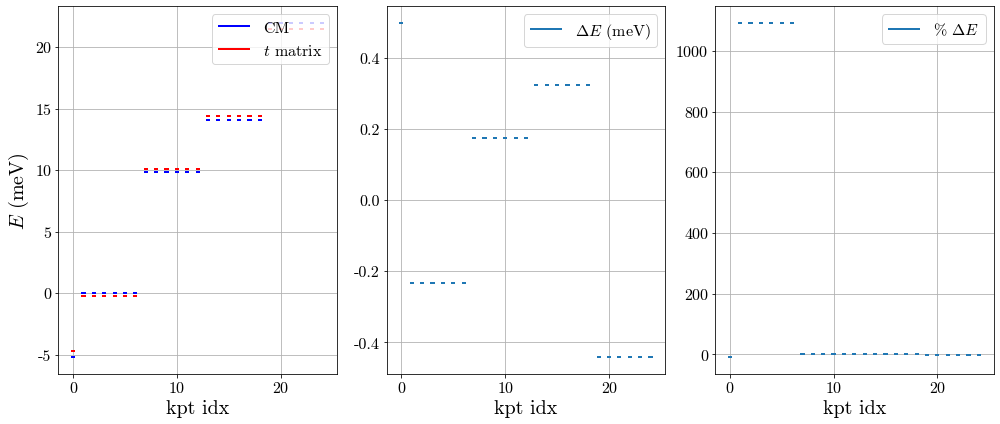

In [45]:
xticks = np.array([i for i in range(basis_obj.nkpt)])
dx = 0.2

fig, axs = plt.subplots(1, 3, figsize=(14, 6))
axs = axs.flatten()

for i in range(basis_obj.nkpt):
    label1, label2 = None, None
    labeld, labelpd = None, None
    
    if i == 0:
        label1 = 'CM'
        label2 = '$t$ matrix'
        labeld = r'$\Delta E$ (meV)'
        labelpd = r'% $\Delta E$'
        
    x = xticks[i]
    axs[0].hlines(bloch_energy[i], x-dx, x+dx, color='b', label=label1)
    axs[0].hlines(t_e[i], x-dx, x+dx, color='r', label=label2)
    
    axs[1].hlines(diff[i], x-dx, x+dx, label=labeld)
    axs[2].hlines(pdiff[i], x-dx, x+dx, label=labelpd)

for ax in axs:
    ax.set_xlabel('kpt idx')
    ax.legend()
    ax.grid()
    
axs[0].set_ylabel('$E$ (meV)')
# axs[2].set_ylim(-10, 10)

The eigenspectrums agree! So we know that the hopping matrix faithfully represents the non-interacting continuum model in the large $\theta$ regime.